In [ ]:
pip install pdf2image

In [ ]:

# pip install opencv-python
# import module
from pdf2image import convert_from_path
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
import os
import pandas as pd

In [ ]:
# %matplotlib inline

In [ ]:
def pdf_to_png(file_path,pdf_path,name_start):
    # poppler_path=r"C:\Users\HP\Desktop\ecg_analysis\libraries\poppler-22.01.0\Library\bin"
    # Store Pdf with convert_from_path function
    images = convert_from_path(pdf_path)
    for i,img in enumerate(images):
        # print(i)
        img.save(file_path+str(name_start)+".png")
    print("Conversion succesful")
def draw(image_,title,width=20,height=18):
    plt.figure(figsize=(width,height))
    plt.title(title)
    plt.imshow(image_)
    
def remove_grid(image_):
    rows=image_.shape[0]
    cols=image_.shape[1]
    for x in range(rows):
        for y in range(cols):
            if (b[x][y]!=(32 , 10, 205))[0] and (b[x][y]!=[255,255,255])[0]:
                print(b[x][y])
                b[x][y]=[255,255,255]
                print(x,y)
                
def binarisation(image_,threshold):
    retval, im_ret = cv2.threshold(image_,threshold,100,cv2.THRESH_BINARY_INV)
    return im_ret

def show_graph(x_list, y_list, title,width=18, height=3):
    plt.figure(figsize = [width, height]) 
    plt.title(title)
    plt.plot(x_list, y_list)
    #plt.scatter(x_list, y_list, marker='.', s=5)
    plt.show()
    return

def data_points_from_image(image_):
    x_list, y_list = [], []
    rows=image_.shape[0]
    cols=image_.shape[1]
    for col in np.arange(cols):
        t=0
        for row in np.arange(rows):
            if image_[row][col] == 100:
                t=1
                x_list.append(col)
                y_list.append(rows-row)
                break
#         if t==0:
#             x_list.append(col)
#             y_list.append(0)    
    return x_list,y_list
def find_peak_loaction(arr_y,arr_x):
    position_list=[]
    value_list=[]
    peak=max(arr_y)
    minima=min(arr_y)
    #thresh=(peak+minima)/2
    thresh=peak-50
    peak_list=[]
    peak_value=[]
    
    val=0
    index=0
    for i,value in enumerate(arr_y):
        #print(value,i)
        if value>=thresh:
            
            position_list.append(arr_x[i])
            value_list.append(value)
        else:
            continue
    
    l=len(position_list)
#     for i in range(l):
#         print(position_list[i],value_list[i])
          
    for i in range(l-1):
        if position_list[i+1]==position_list[i]+1 :


            if val<value_list[i]:
                val=max(val,value_list[i])
                index=i      
            if i==l-2:
                #print("VF")
                peak_value.append(val)
                peak_list.append(position_list[index])

        else:
            if val<value_list[i]:
                val=max(val,value_list[i])
                index=i
            peak_value.append(val)
            peak_list.append(position_list[index])


            val=0


    return peak_list,peak_value

def graph_with_peaks(x_list,y_list,title,peak_list,width=12,height=3):
    #plt.figure(figsize=(12,10))
    plt.figure(figsize = [width, height]) 
    plt.title(title)
    plt.plot(x_list, y_list)
    for i in peak_list:
        plt.axvline(x = i, color = "red", label = "Index 5",ls='-.') 
    #plt.plot(peak_list,[0]*len(peak_list))
    #plt.scatter(x_list, y_list, marker='.', s=5)
    plt.show()
    return

def processing(image_,name):
    
    # draw(image_,"extracted image"+name)
    # gray scale conversion
    gray=cv2.cvtColor(image_ ,cv2.COLOR_BGR2GRAY)
    # draw(gray,"gray scale conversion"+name)
    
    #binarisation
    th=np.min(np.unique(gray))+5
    ret=binarisation(gray,th)
    # draw(ret,"binarisation of image"+name)
    
    #conversion to signal graph
    x_list,y_list=data_points_from_image(ret)
    # show_graph(x_list,y_list,"image converted to data point signal "+name)
    
    #finding peaks in signal graph
    peak_list,peak_value=find_peak_loaction(y_list,x_list)
    # graph_with_peaks(x_list,y_list,"peak detected in signal graph"+name,peak_list)
    
    # draw(image_,"peak detection in real image"+name)
    # for i in peak_list:
    #         plt.axvline(x = i, color = "green", label = "Index 5",ls='-.') 
    # plt.show()
    
    return peak_list,peak_value

#show_graph(x_list, y_list, 18, 3)


# Reading Pdf files

In [ ]:
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
path=r"/content/drive/MyDrive/Final year project/Ecg Dataset"
pdf_paths=[]

for filename in os.listdir(path):
  pdf_paths.append(path+"/"+filename)

In [ ]:
# path=r"/content/sample_data/dataset_ecg"
# pdf_paths=[]

# for filename in os.listdir(path):
#   pdf_paths.append(path+"/"+filename)

# Conversion of pdf to png


In [ ]:
file_path=r"./sample_data/dataset_ecg/"
for pdf in pdf_paths:
  name= pdf.split("/")[-1].split(".")[0]
  pdf_to_png(file_path,pdf,name)

Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion succesful
Conversion su

## Reading images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import time
# st=time.time()
# #conversion of pdf to png
# img_path=r"/content/sample_data/dataset_ecg/ECG 2022-03-01 18_20+0530.png"

# #reading png file

# a=cv2.imread(img_path)

# #conversion to grey scale
# img1=a[600:800, 108:2080]#a[600:840, 108:2080]
# img2=a[900:1140, 108:2080]
# img3=a[1180:1420, 108:2080]#


# et=time.time()
# print(et-st)

0.04298734664916992


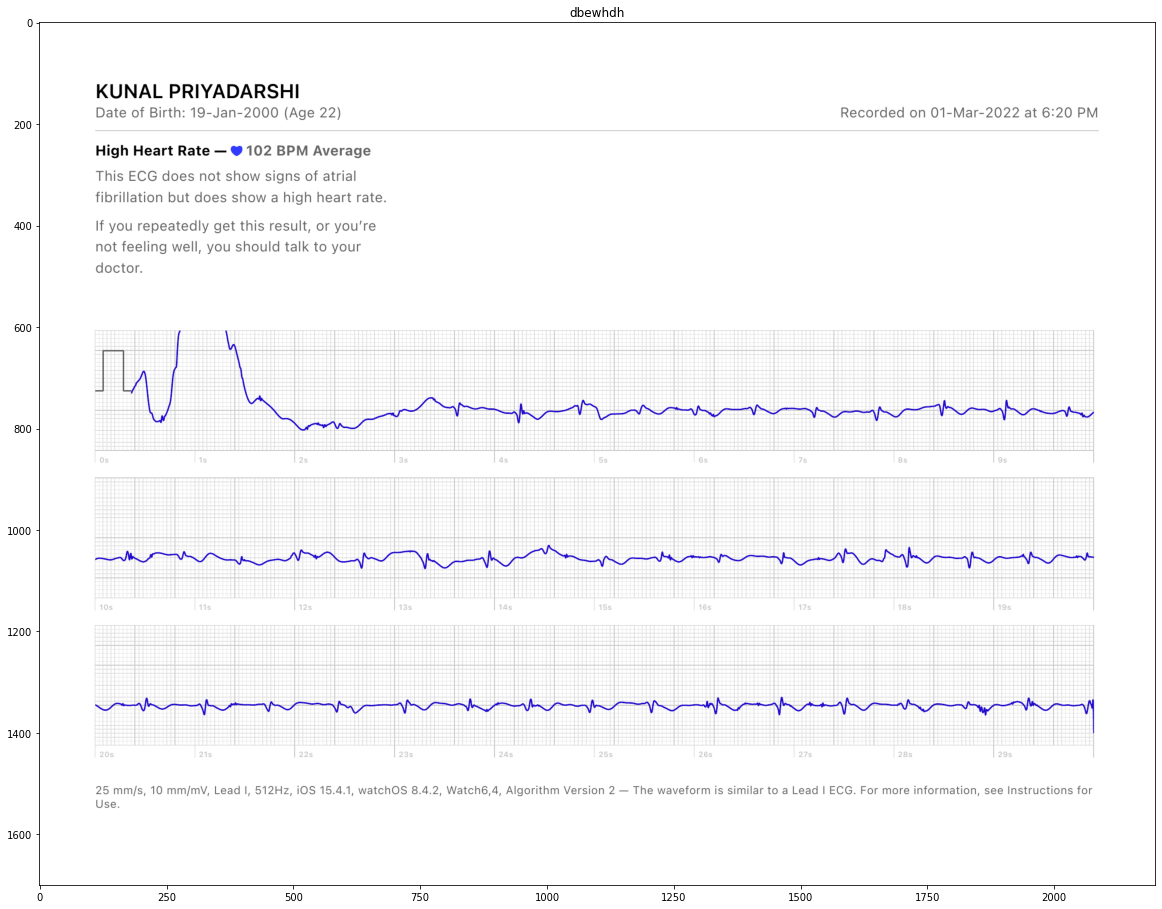

In [ ]:
# draw(a,"dbewhdh")


In [ ]:
sheet= pd.read_excel(r"/content/drive/MyDrive/Final year project/ecg dataset sheet.xlsx")
#sheet["PDF NAME"].replace(".pdf",".png",inplace=True)
sheet["emotion"]=["stressed" if pd.isna(sheet["UNSTRESSED"][i]) else "unstressed" for i in range(len(sheet)) ]
sheet

,Unnamed: 0,GENDER,AGE,ACTUAL ECG,STRESSED,UNSTRESSED,DRIVING EXP,PDF NAME,emotion
0,1.0,male,29.0,71.0,NaN,YES,16.0,ECG 2022-03-01 18_17+0530.pdf,unstressed
1,2.0,male,23.0,102.0,YES,NaN,4.0,ECG 2022-03-01 18_20+0530.pdf,stressed
2,3.0,male,25.0,81.0,NaN,YES,10.0,ECG 2022-03-01 18_30+0530.pdf,unstressed
3,4.0,male,22.0,143.0,YES,NaN,0.0,ECG 2022-03-01 18_50+0530.pdf,stressed
4,5.0,male,29.0,119.0,YES,NaN,15.0,ECG 2022-03-01 18_57+0530.pdf,stressed
...,...,...,...,...,...,...,...,...,...
451,452.0,male,28.0,124.0,YES,NaN,15.0,ECG 2022-04-19 18_53+0530.pdf,stressed
452,453.0,male,28.0,121.0,YES,NaN,15.0,ECG 2022-04-19 18_54+0530.pdf,stressed
453,454.0,male,60.0,120.0,NaN,YES,40.0,ECG 2022-04-19 18_54+0530.pdf,unstressed
454,455.0,male,60.0,123.0,NaN,YES,40.0,ECG 2022-04-19 18_55+0530.pdf,unstressed


In [ ]:
 # import pandas as pd
# df=pd.DataFrame(columns=["age","gender","years_of_driving_experience","AVRR","AVHR","R_AVG","no_of_peaks"])
# d={"age":53,"gender":"F","years_of_driving_experience":12,"AVRR":AVRR,"AVHR":AVHR,"R_AVG":R_avg,"no_of_peaks":len(peak_list3)}

# for AVRR
# 50 big boxes =1972 pixels
#50*5 small boxes= 1972 pixel
#1 pixel=0.12 of a small box
#25 small boxes= 1 s
#1 small box=0.04 sec
#1 sec=60 ms

def find_AVHR(pk1,pk2,pk3):
    # AVHR=((len(pk1)+1)*6+len(pk2)*6+len(pk3)*6)/3
    AVHR=(len(pk1)*6+len(pk2)*6+len(pk3)*6)/3
    return AVHR 

def find_AVRR(pk):
    l=len(pk)
    s=0
    for i in range(l-1):
        s+=abs(pk[i+1]-pk[i])
    AVRR=s/l# in pixels
    AVRR= AVRR*0.12*0.04*60# in ms
    
    return AVRR

def find_avg_R_wave_peak(pk):
    return sum(pk)/len(pk)


def read_and_process(img_path):
  a=cv2.imread(img_path)
  
  #conversion to grey scale
  img1=a[600:800, 108:2080]#a[600:840, 108:2080]
  img2=a[900:1140, 108:2080]
  img3=a[1180:1420, 108:2080]#
  peak_list1,peak_value1=processing(img1," image 1")
  peak_list2,peak_value2=processing(img2,"image 2")
  peak_list3,peak_value3=processing(img3, "image 3")
  AVHR=find_AVHR(peak_list1,peak_list2,peak_list3)
  AVRR=find_AVRR(peak_list3)# in pixels
  R_avg=find_avg_R_wave_peak(peak_value3)
  d={"pk1":{"AVRR":find_AVRR(peak_list1), "AVHR":AVHR,"R_avg":find_avg_R_wave_peak(peak_value1),"n_peaks":len(peak_list1) },
     "pk2":{"AVRR":find_AVRR(peak_list2), "AVHR":AVHR,"R_avg":find_avg_R_wave_peak(peak_value2) ,"n_peaks":len(peak_list2) },
     "pk3":{"AVRR":find_AVRR(peak_list3), "AVHR":AVHR,"R_avg":find_avg_R_wave_peak(peak_value3),"n_peaks":len(peak_list3) }}
  return d



In [ ]:
# nn="/content/sample_data/dataset_ecg/ECG 2022-03-01 17_51+0530.png"
# a=cv2.imread(nn)
# draw(a,"gcf")

In [ ]:
path="/content/sample_data/dataset_ecg/"

df=pd.DataFrame(columns=["age","actual HR","name","gender","years_of_driving_experience","AVRR","AVHR","R_AVG","no_of_peaks","emotion"])
#d={"age":53,"gender":"F","years_of_driving_experience":12,"AVRR":AVRR,"AVHR":AVHR,"R_AVG":R_avg,"no_of_peaks":len(peak_list3)}
df_nw=pd.DataFrame(columns=sheet.columns)

for i in range(len(sheet["PDF NAME"])):
    path_name=path+sheet["PDF NAME"][i].split(".")[0]+".png"
    try:
      di=read_and_process(path_name)
    except:
      df_nw=df_nw.append(sheet.iloc[i])
      continue

    for j in ["pk1","pk2","pk3"]:
      AVRR=di[j]["AVRR"]
      AVHR=di[j]["AVHR"]
      R_avg=di[j]["R_avg"]
      n_peaks=di[j]["n_peaks"]
      HR=sheet["ACTUAL ECG"][i]
      emotion=sheet["emotion"][i]
      d={"age":sheet["AGE"][i],"actual HR":HR,"name":sheet["PDF NAME"][i],"gender":sheet["GENDER"][i],"years_of_driving_experience":sheet["DRIVING EXP"][i],"AVRR":AVRR,"AVHR":AVHR,"R_AVG":R_avg,"no_of_peaks":n_peaks,"emotion":emotion}
      df=df.append(d,ignore_index=True)
    print(path_name)

/content/sample_data/dataset_ecg/ECG 2022-03-01 18_17+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 18_20+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 18_30+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 18_50+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 18_57+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 19_01+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 19_28+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 19_31+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 19_45+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 20_00+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 20_26+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 20_28+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 20_31+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 20_38+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 20_41+0530.png
/content/sample_data/dataset_ecg/ECG 2022-03-01 21_24+0

In [ ]:
df

,age,actual HR,name,gender,years_of_driving_experience,AVRR,AVHR,R_AVG,no_of_peaks,emotion
0,29.0,71.0,ECG 2022-03-01 18_17+0530.pdf,male,16.0,33.888000,48.0,173.000000,3,unstressed
1,29.0,71.0,ECG 2022-03-01 18_17+0530.pdf,male,16.0,61.600000,48.0,105.666667,9,unstressed
2,29.0,71.0,ECG 2022-03-01 18_17+0530.pdf,male,16.0,42.840000,48.0,93.333333,12,unstressed
3,23.0,102.0,ECG 2022-03-01 18_20+0530.pdf,male,4.0,13.104000,8.0,192.000000,2,stressed
4,23.0,102.0,ECG 2022-03-01 18_20+0530.pdf,male,4.0,0.000000,8.0,110.000000,1,stressed
...,...,...,...,...,...,...,...,...,...,...
1255,38.0,143.0,ECG 2022-03-31 19_32+0530.pdf,male,17.0,12.582400,254.0,104.200000,45,stressed
1256,38.0,143.0,ECG 2022-03-31 19_32+0530.pdf,male,17.0,17.865290,254.0,94.741935,31,stressed
1257,38.0,141.0,ECG 2022-03-31 19_33+0530.pdf,male,17.0,0.000000,148.0,177.000000,1,stressed
1258,38.0,141.0,ECG 2022-03-31 19_33+0530.pdf,male,17.0,16.616727,148.0,102.545455,33,stressed


In [ ]:
writer = pd.ExcelWriter('final_data_50.xlsx')
# write dataframe to excel
df.to_excel(writer)
# save the excel
writer.save()

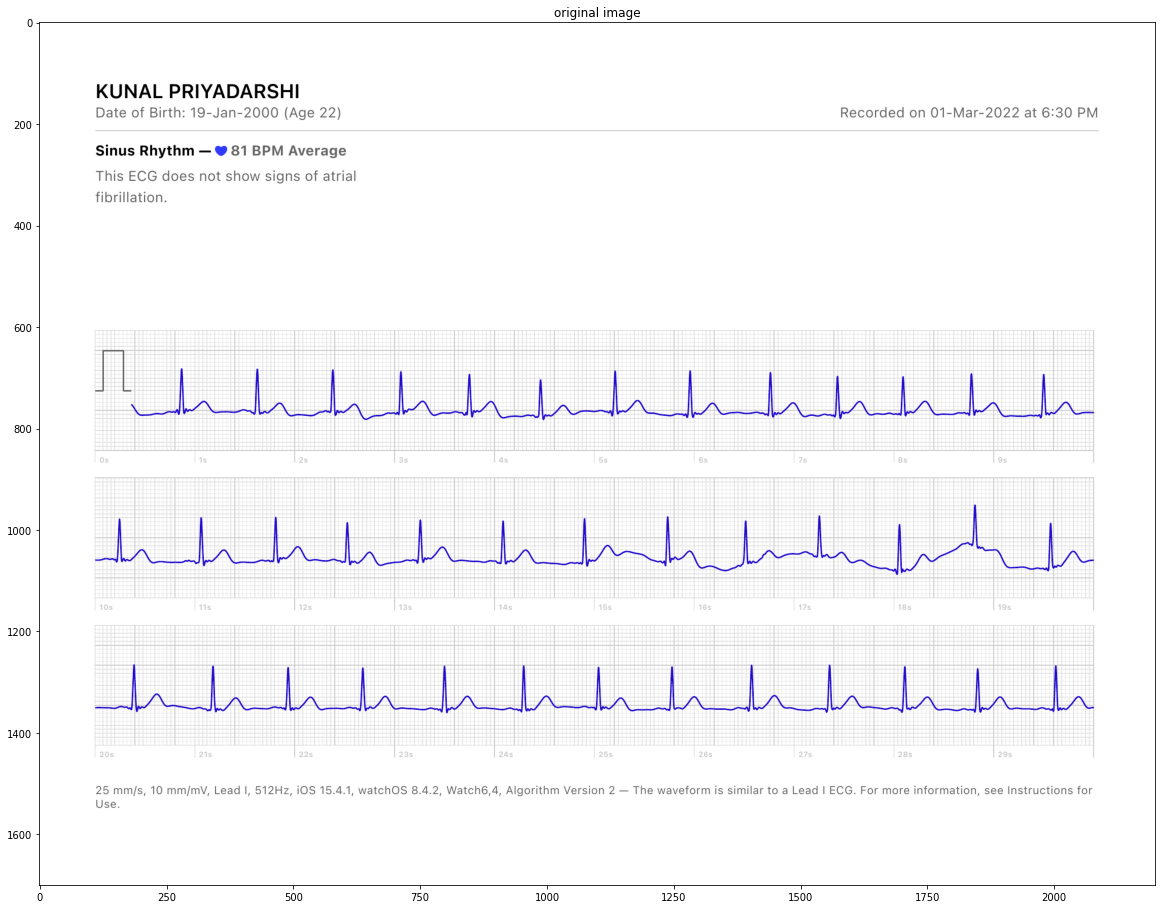

In [ ]:
# draw(a,"original image")
# peak_list1,peak_value1=processing(img1," image 1")

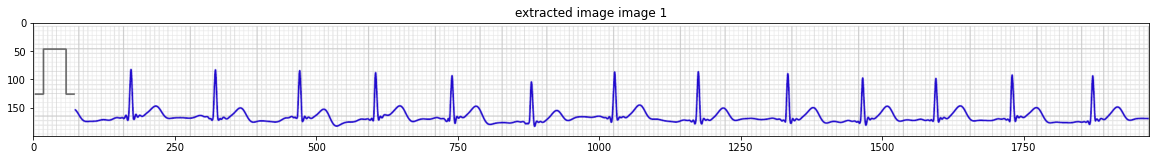

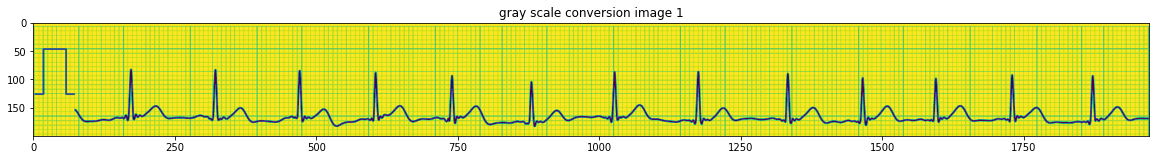

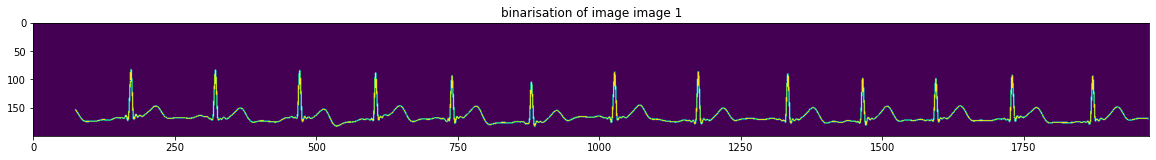

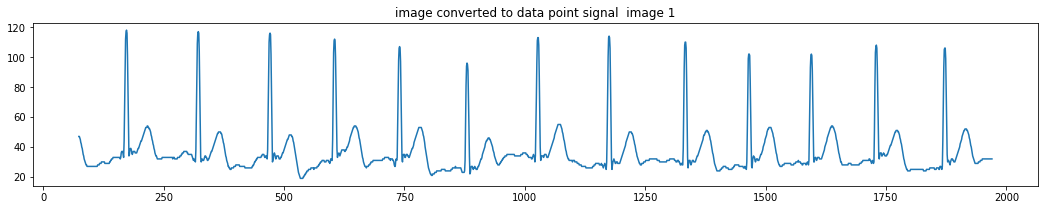

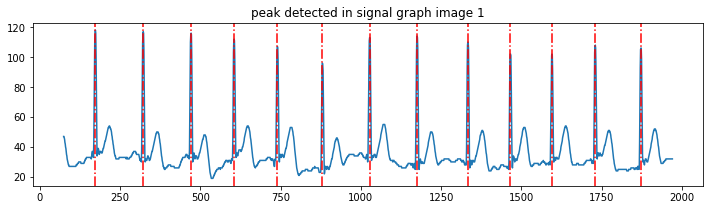

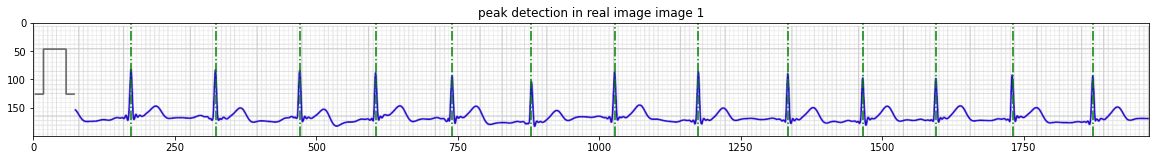

In [ ]:
peak_list1,peak_value1=processing(img1," image 1")

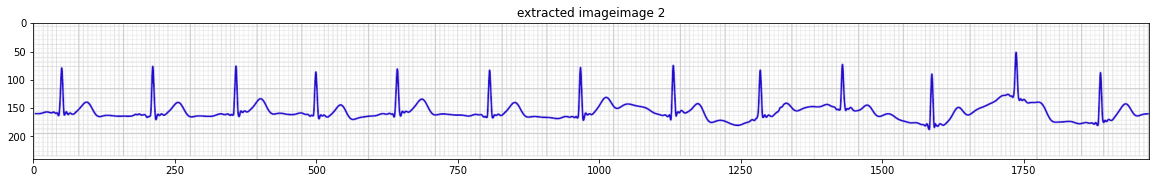

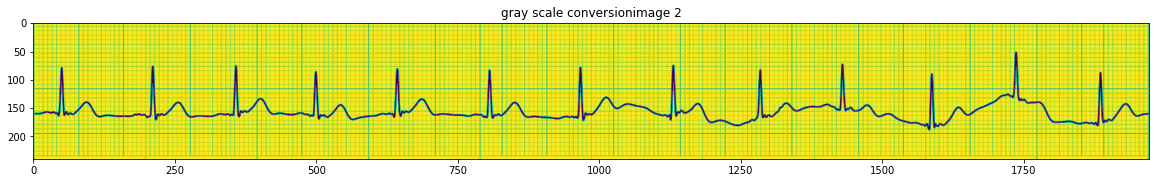

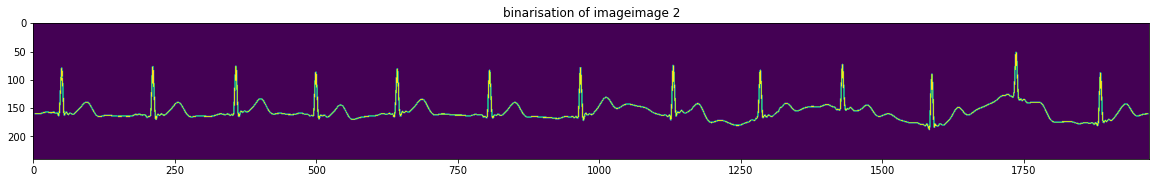

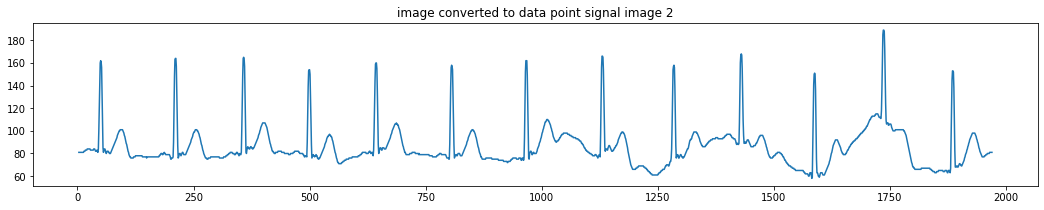

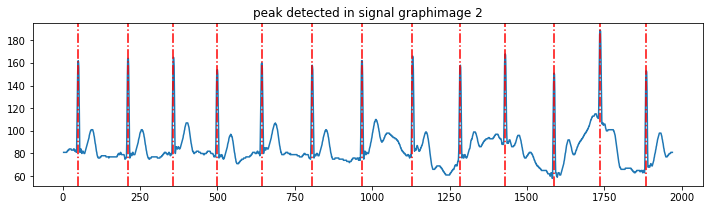

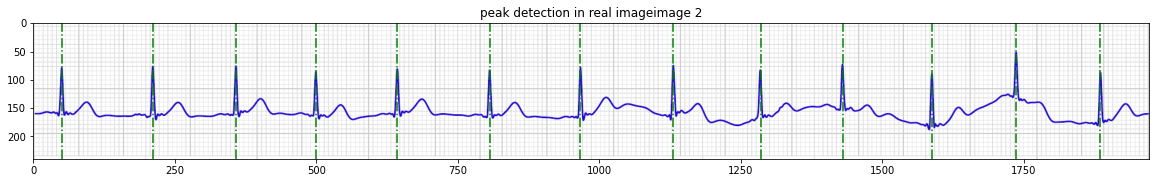

In [ ]:
peak_list2,peak_value2=processing(img2,"image 2")

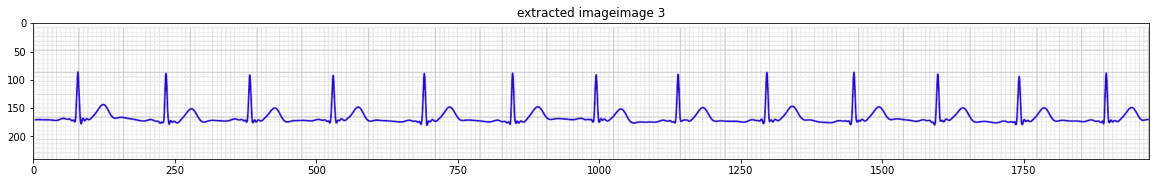

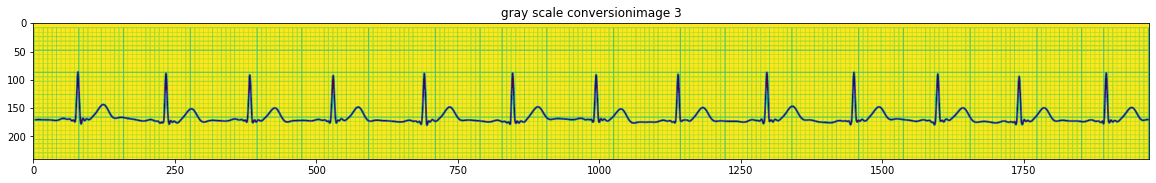

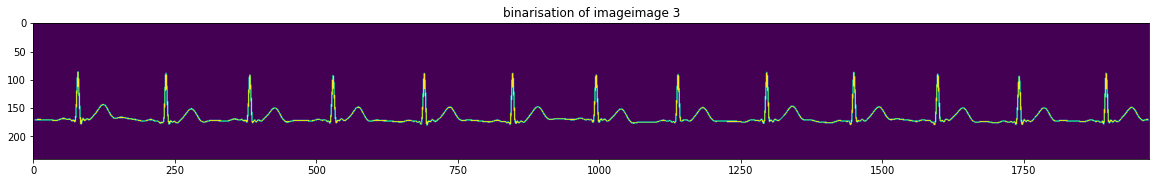

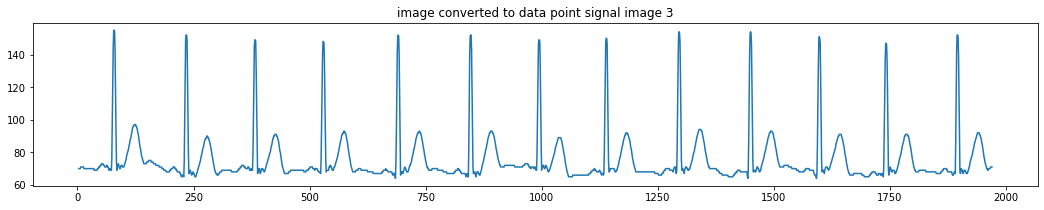

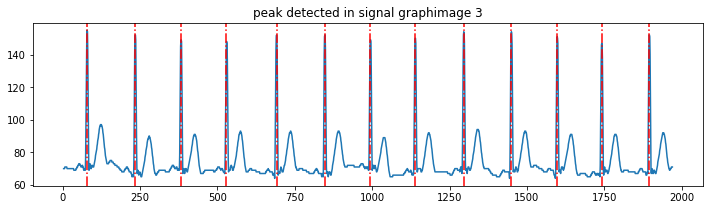

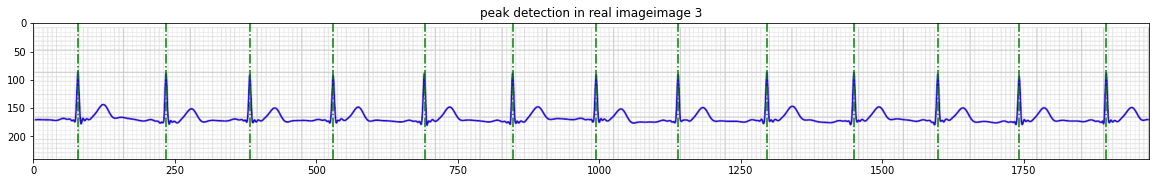

In [ ]:
peak_list3,peak_value3=processing(img3, "image 3")

In [1]:
import pandas as pd
df2=pd.read_excel("/content/final_data_2 (1).xlsx")
df2["gender"]=["female" if i !="male" else "male" for i in df2["gender"]]

In [2]:
df3=df2.where(df2["no_of_peaks"]<30).dropna()
# df3["new"]=df3["no_of_peaks"]*df3["AVRR"]
# df3["new2"]=df3["no_of_peaks"]*(df3["AVRR"])*(df3["AVRR"])*df3["AVHR"]

In [ ]:
df3=df2.copy()

In [6]:
cols=['age', 'gender', 'AVHR',
       'years_of_driving_experience', 'AVRR', 'R_AVG', 'no_of_peaks',
       ]

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3[cols], df3["emotion"], test_size=0.2, random_state=42)

In [ ]:
def outlier_removal(data,y_data,col):
    

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range. 

        filter = (data[col] >= Q1 - 1.5 * IQR) & (data[col]<= Q3 + 1.5 *IQR)
        
        return data.loc[filter],y_data.loc[filter]

In [ ]:
X_train,y_train=outlier_removal(X_train,y_train,"no_of_peaks")
X_train.shape,y_train.shape
X_train,y_train=outlier_removal(X_train,y_train,"AVHR")
X_train.shape,y_train.shape

((1000, 7), (1000,))

In [ ]:
np.sum(abs(df2["actual HR"]-df2["AVHR"]))/df2.shape[0]

52.69761904761905

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


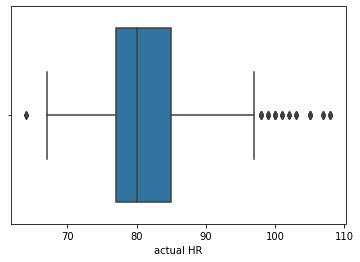

In [ ]:
sns.boxplot(X_train["actual HR"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


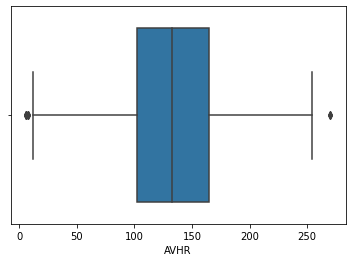

In [ ]:
sns.boxplot(df2["AVHR"])

In [8]:
X_train = pd.get_dummies(X_train, columns = ["gender"])
X_test=pd.get_dummies(X_test, columns = ["gender"])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# transform data
Y_train = encoder.fit_transform(y_train)
Y_test= encoder.transform(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [ ]:
X_train[0]

array([ 0.73987313,  1.37305443,  0.34917999,  0.32572518, -1.1707475 ,
       -0.6466324 , -0.60778057,  0.60778057])

In [ ]:
# from tensorflow.compat.v1.keras.utils import to_categorical
# Y_train = to_categorical(Y_train)
# Y_test = to_categorical(Y_test)
# print(y_train.shape)

(736,)


# Model

In [ ]:
,max_depth=7,max_features=6

In [ ]:
# from sklearn.ensemble import RandomForestClassifier  
# classifier= RandomForestClassifier(n_estimators= 50, criterion="entropy",max_depth=6,max_features=7,random_state=0)  
# classifier.fit(X_train, Y_train)  

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=7,
                       n_estimators=50, random_state=0)

In [ ]:
y_pred= classifier.predict(X_test) 

In [ ]:
np.sum(Y_test==y_pred)/len(y_pred)

0.8369565217391305

In [ ]:
from sklearn.ensemble import RandomForestClassifier  

In [12]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 50, criterion="entropy",max_depth=6,max_features=7,random_state=0,)  
classifier.fit(X_train, Y_train)  
print(classifier.score(X_train,Y_train))
print('Model Accuracy:', classifier.score(X_test,Y_test))

0.8614130434782609
Model Accuracy: 0.8152173913043478


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
y_pred=clf.predict(X_test)

In [ ]:
print(clf.score(X_train,Y_train))
print('Model Accuracy:', clf.score(X_test,Y_test))

0.5353260869565217
Model Accuracy: 0.5760869565217391


In [ ]:
scores = cross_val_score(clf, X_test, Y_test, cv=5)
scores

array([0.56756757, 0.62162162, 0.7027027 , 0.7027027 , 0.69444444])

In [ ]:
accuracy_score(Y_test, y_pred)

0.6793478260869565

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42).fit(X_train, Y_train)
y_pred=clf.predict(X_test)
scores = cross_val_score(clf, X_train, Y_train, cv=5)
scores

array([0.58783784, 0.59863946, 0.55782313, 0.55782313, 0.49659864])

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average='macro')

0.42030223741122447

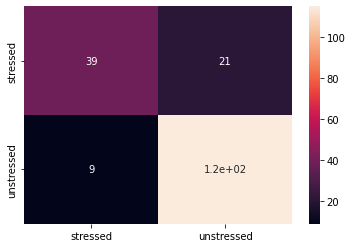

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred= classifier.predict(X_test) 
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True,xticklabels=["stressed","unstressed"],yticklabels=["stressed","unstressed"])

In [16]:
#ANN
import tensorflow as tf
# Create / initialize sequential model 
ann_model = tf.keras.models.Sequential()
#Dense layer as first layer with 10 neurons, input share (187,) and and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape=(8,)))
#Dense layer as second layer with 10 neurons and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(60, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Dense layer as third layer with 10 neurons and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(40, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Dense layer as fourth layer with 10 neurons and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
# #Softmax as last layer with two outputs
ann_model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [17]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.00001)
ann_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                180       
                                                                 
 dense_6 (Dense)             (None, 60)                1260      
                                                                 
 dense_7 (Dense)             (None, 40)                2440      
                                                                 
 dense_8 (Dense)             (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 2)                 42        
                                                                 
Total params: 4,742
Trainable params: 4,742
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=ann_model.fit(X_train, Y_train,epochs=10, batch_size=64, verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 1.2352 - accuracy: 0.5802 - val_loss: 0.7304 - val_accuracy: 0.6522
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7872 - accuracy: 0.4660 - val_loss: 0.7355 - val_accuracy: 0.6087
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7164 - accuracy: 0.6481 - val_loss: 0.6599 - val_accuracy: 0.6685
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6304 - val_loss: 0.6495 - val_accuracy: 0.6739
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6698 - val_loss: 0.6510 - val_accuracy: 0.6902
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6590 - val_loss: 0.6463 - val_accuracy: 0.6739
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.6766 - val_loss: 0.6455 - val_accuracy: 0.7011
Epoch 8/10
12/12 [=

In [ ]:
results = ann_model.evaluate(X_test, Y_test, batch_size=64)
print("test loss, test acc:", results)


3/3 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.6576
test loss, test acc: [0.6350805759429932, 0.657608687877655]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


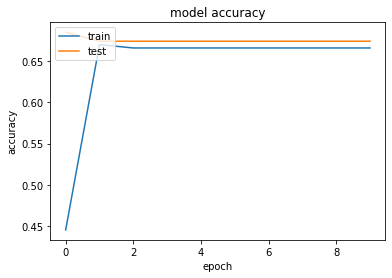

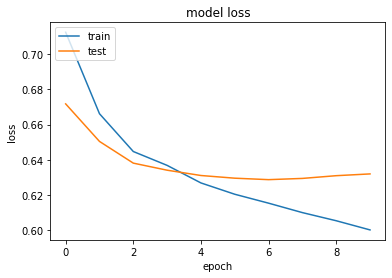

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(Y_test, y_pred)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


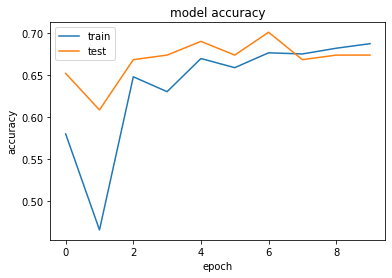

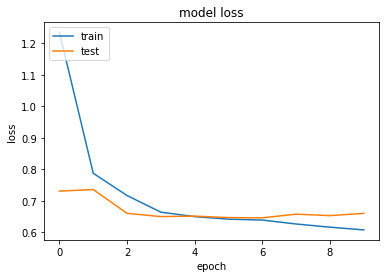

In [20]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
d={"age":53,"gender":"F","years_of_driving_experience":12,"AVRR":AVRR,"AVHR":AVHR,"R_AVG":R_avg,"no_of_peaks":len(peak_list3)}
df=df.append(d,ignore_index=True)

In [ ]:
df=df.append(d,ignore_index=True)

In [ ]:
df

,age,gender,years_of_driving_experience,AVRR,AVHR,R_AVG,no_of_peaks
0,53,F,12,43.176000,72.0,166.250000,12
1,53,F,12,43.540364,72.0,121.181818,11
2,53,F,12,43.824000,72.0,157.166667,12


In [ ]:
df["emotion"]=["relaxed","relaxed","relaxed"]

In [ ]:
df

,age,gender,years_of_driving_experience,AVRR,AVHR,R_AVG,no_of_peaks,emotion
0,53,F,12,43.176000,72.0,166.250000,12,relaxed
1,53,F,12,43.540364,72.0,121.181818,11,relaxed
2,53,F,12,43.824000,72.0,157.166667,12,relaxed


In [ ]:
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter

## A high pass filter allows frequencies higher than a cut-off value
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a
## A low pass filter allows frequencies lower than a cut-off value
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a
#code to remove powerline interference from ECG signal we use iir notch filter
def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def highpass(data, fs, order=5):
    b,a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b,a,data)
    return x

def lowpass(data, fs, order =5):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

def final_filter(data, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b, a, data)
    d, c = butter_lowpass(cutoff_low, fs, order = order)
    y = lfilter(d, c, x)
    #f, e = notch_filter(powerline, 30)
    #z = lfilter(f, e, y)     
    return y

def normalisation(signal):
    signal=preprocessing.normalize(signal)
    return(signal)

fs = 15.5
## Order of five works well with ECG signals
cutoff_high = 0.34
cutoff_low = 4
powerline = 30
order = 5

for k in range(len(all_signal)):
    plt.figure(figsize=(10,6))
    plt.suptitle("Driver {}".format(k), fontsize=20)
    ax1 = plt.subplot(211)
    plt.plot(all_signal[k].T[0][0:int(15.5 * 60)])
    ax1.set_title("Raw ECG signal")
    plt.show()
    plt.figure(figsize=(10,6))
    filter_signal = final_filter(normalisation(all_signal[k]).T[0], fs, order)[0:int(15.5 * 60)]
    ax2 = plt.subplot(212)
    #print(normalisation(filter_signal).shape)
    plt.plot(filter_signal)
    ax2.set_title("filtered and normalised ECG signal")
    plt.show()

NameError: name 'all_signal' is not defined

In [ ]:
from __future__ import division
from matplotlib import pyplot as plt
import scipy.io as spio
import numpy as np
import statistics
from scipy.stats import kurtosis
from scipy.stats import skew
import sys
#sys.path.append("/home/chandan/python-workspace/")
#import BOCPD as ocpd #import bocpd from another file
import cProfile
from functools import partial

#independent function to calculate RMSSD
def calc_rmssd(list):
    diff_nni = np.diff(list)#successive differences
    return np.sqrt(np.mean(diff_nni ** 2))
    
    
 #independent function to calculate AVRR   
def calc_avrr(list):
    
    return sum(list)/len(list)

 #independent function to calculate SDRR   
def calc_sdrr(list):
    return statistics.stdev(list)

 #independent function to calculate SKEW   
def calc_skew(list):
    return skew(list)

 #independent function to calculate KURT   
def calc_kurt(list):
    return kurtosis(list)

#sliding window function
def slidingWindow(sequence,winSize,step):
    """Returns a generator that will iterate through
    the defined chunks of input sequence.  Input sequence
    must be iterable."""
 
    # Verify the inputs
    try: it = iter(sequence)
    except TypeError:
        raise Exception("**ERROR** sequence must be iterable.")
    if not ((type(winSize) == type(0)) and (type(step) == type(0))):
        raise Exception("**ERROR** type(winSize) and type(step) must be int.")
    if step > winSize:
        raise Exception("**ERROR** step must not be larger than winSize.")
    if winSize > len(sequence):
        raise Exception("**ERROR** winSize must not be larger than sequence\
                        length.")
    # Pre-compute number of chunks to emit
    numOfChunks = ((len(sequence)-winSize)/step)+1
    # Do the work
    for i in range(0,int(numOfChunks)*step,step):
        yield sequence[i:i+winSize]
        
####################### FEATURE EXTRACTION ####################################

def feature_extract(list_rri, winSize,step,feature):
    chunklist=list(slidingWindow(list_rri,winSize,step))
    featureList=[]
    if(feature=="RMSSD"):
        sublist=list_rri
        return calc_rmssd(sublist)
    elif(feature=="AVRR"):
        sublist=list_rri
        return calc_avrr(sublist)
    elif(feature=="SDRR"):
        sublist=list_rri
        return calc_sdrr(sublist)
    elif(feature=="SKEW"):
        sublist=list_rri
        return calc_skew(sublist)
    elif(feature=="KURT"):
        sublist=list_rri
        return calc_kurt(sublist)
    
    return featureList    
  
########################### PLOTTING ##########################################
def plot_features(featureList,label):
    plt.title(label)
    plt.plot(featureList)
    plt.show()

###################### CALLING FEATURE METHODS ################################
def browsethroughSeizures(list_rri,winSize,step):
    features=["RMSSD","AVRR","SDRR","SKEW","KURT"]
    l=[]
    for item in features:
        featureList=feature_extract(list_rri,winSize,step,item)
        l.append(featureList)
    return l


In [ ]:
df=pd.DataFrame(columns=["RMSSD","AVHR","SDRR","SKEW","KURT"])
for i in range(len(all_signal)):
    df.loc[len(df.index)]=browsethroughSeizures(all_signal[i].T[0],10,5)

In [ ]:
df